<a href="https://colab.research.google.com/github/Dreys-bot/Classification-cat_vs_dog/blob/main/classification_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2022-02-16 13:52:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   106MB/s    in 0.6s    

2022-02-16 13:52:20 (106 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os

#Dezippons notre dossier d'image
import zipfile
#Indiquons le chemin d'accès
local_file = '/tmp/cats_and_dogs_filtered.zip'
#Ouvrons le fichier en modelecture
zip_ref = zipfile.ZipFile(local_file, 'r')
#Extraction du contenu
zip_ref.extractall('/tmp')
zip_ref.close()



In [ ]:
#Dans cette partie nous allons recuperons les dossiers des photos

#recuperons d'abord le dossier de travail
work_file = '/tmp/cats_and_dogs_filtered'

#recuperons les dossiers qui contiennent les photos d'entrainement et de validation
train_file = os.path.join(work_file, 'train')
validation_file = os.path.join(work_file, 'validation')

#recuperons les dphotos d'entrainement et de validation
train_cat_file = os.path.join(train_file, 'cats')
train_dogs_file = os.path.join(train_file, 'dogs')

#recuperons de meme pour la validation
validation_cat_file = os.path.join(validation_file, 'cats')
validation_dog_file = os.path.join(validation_file, 'dogs')

#Listons les differents fichiers qui sont dans nos dossiers
train_cat_fnames = os.listdir(train_cat_file)
train_dog_fnames = os.listdir(train_dogs_file)

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])


#Affichons le nombre d'images que nosu disposons
print("le total d'images de chat d'entrainement est :", len(os.listdir(train_cat_file)))
print("le total d'images de chiens d'entrainement est :", len(os.listdir(train_dogs_file)))

print("le total d'images de chat de validation est :", len(os.listdir(validation_cat_file)))
print("le total d'images de chiens de validation est :", len(os.listdir(validation_dog_file)))

['cat.527.jpg', 'cat.3.jpg', 'cat.820.jpg', 'cat.765.jpg', 'cat.880.jpg']
['dog.207.jpg', 'dog.577.jpg', 'dog.156.jpg', 'dog.624.jpg', 'dog.264.jpg']
le total d'images de chat d'entrainement est : 1000
le total d'images de chiens d'entrainement est : 1000
le total d'images de chat de validation est : 500
le total d'images de chiens de validation est : 500


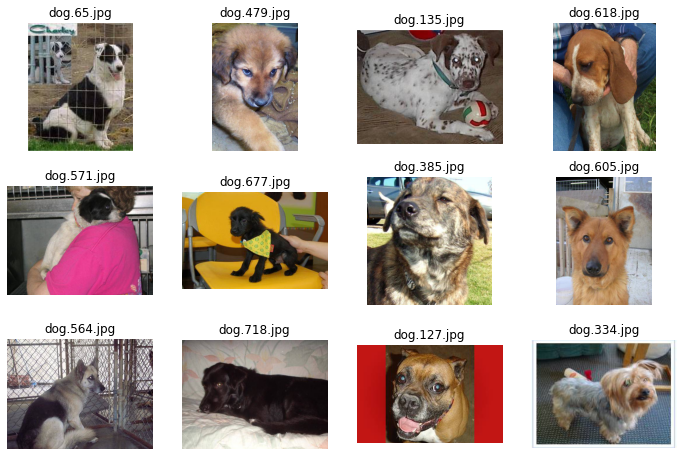

In [ ]:
#Affichons les images de chien

sample_dogs = np.random.choice(os.listdir(train_dogs_file), size=12)
plt.figure(figsize=(12,8))
for i,dog in enumerate(sample_dogs):
  ax = plt.subplot(3, 4, i+1)
  img = mping.imread(os.path.join(train_dogs_file, dog))
  plt.axis("off")
  plt.imshow(img)
  ax.set_title(dog)

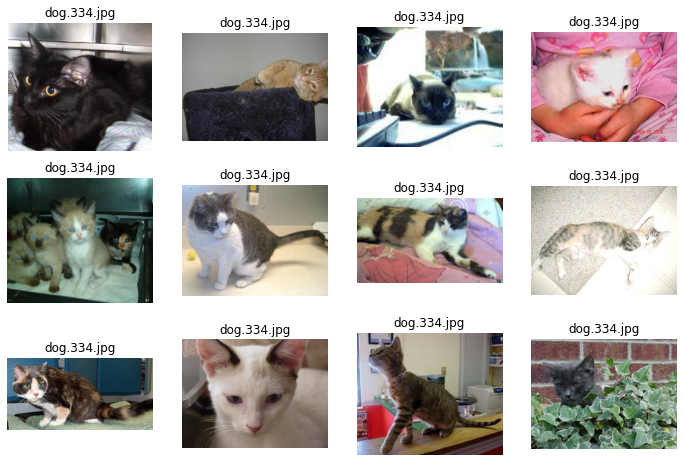

In [ ]:
#Affichons les images de chats
Sample_cat = np.random.choice(os.listdir(train_cat_file), size=12)

plt.figure(figsize=(12,8))
for i, cat in enumerate(Sample_cat):
  ax = plt.subplot(3,4, i+1)
  img = mping.imread(os.path.join(train_cat_file, cat))
  plt.imshow(img)
  ax.set_title(dog)
  plt.axis('off')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_file,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_file,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150,3), activation = 'relu') ,
        tf.keras.layers.MaxPooling2D((2,2))   ,
        tf.keras.layers.Conv2D(64, (3,3), input_shape=(150, 150,3), activation = 'relu') ,
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(128, (3,3), input_shape=(150, 150,3), activation = 'relu') ,
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation = 'relu'),
         tf.keras.layers.Dense(1,activation = 'sigmoid')                   
                                    
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics = ['acc'])

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch =100,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=50
                    )

Epoch 1/10
100/100 [==============================] - 23s 121ms/step - loss: 0.8139 - acc: 0.5375 - val_loss: 0.6778 - val_acc: 0.6450
Epoch 2/10
100/100 [==============================] - 11s 111ms/step - loss: 0.6825 - acc: 0.6250 - val_loss: 0.6169 - val_acc: 0.6530
Epoch 3/10
100/100 [==============================] - 11s 113ms/step - loss: 0.5989 - acc: 0.6980 - val_loss: 0.6007 - val_acc: 0.6790
Epoch 4/10
100/100 [==============================] - 11s 113ms/step - loss: 0.5059 - acc: 0.7625 - val_loss: 0.6256 - val_acc: 0.6850
Epoch 5/10
100/100 [==============================] - 11s 113ms/step - loss: 0.4593 - acc: 0.7800 - val_loss: 0.5611 - val_acc: 0.7240
Epoch 6/10
100/100 [==============================] - 11s 114ms/step - loss: 0.3867 - acc: 0.8185 - val_loss: 0.6065 - val_acc: 0.7240
Epoch 7/10
100/100 [==============================] - 11s 112ms/step - loss: 0.3000 - acc: 0.8710 - val_loss: 0.6859 - val_acc: 0.7020
Epoch 8/10
100/100 [==============================] - 1

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

In [ ]:
model.save('catvsdog_classification')

INFO:tensorflow:Assets written to: catvsdog_classification/assets


In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/tmp/dog2.jpg',target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]

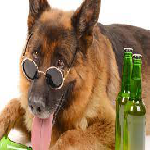

In [ ]:
img

In [ ]:
model.predict(x)

array([[1.]], dtype=float32)

In [ ]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}